# **Analyze Semantic Change**
## **Goal**: Use trained `Word2vec` embeddings to examine semantic change over time.

### **Imports**

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

from ngramkit.common.w2v_model import W2VModel
from ngramkit.ngram_analyze.cosine_similarity_time_series import cosine_similarity_over_years, plot_nearest_neighbors
from ngramkit.ngram_analyze.weat_time_series import compute_weat_over_years
from ngramkit.ngram_analyze.semantic_drift import track_yearly_drift, compute_similarity_to_previous_year
from ngramkit.ngram_analyze.average_relatedness_by_year import track_word_semantic_drift

The `ngram-kit` package contains several tools useful in quantifying how much word meanings have changed over the years. Before using these tools, it helps to set a model path variable. Most commonly, this will point to the `norm_and_align` directory. We'll also set a `corpus_path` variable pointing to the yearly corpus data.

In [2]:
model_path =  '/scratch/edk202/NLP_models/Google_Books/20200217/eng/5gram_files/models_final/norm_and_align'

### `compare_words_cosim` method

Let's say we want to measure the relationship between three pairs of words — _horse_ and _donkey_, _horse_ and _lizard_ , and _horse_ and _amoeba_ — in the 2019 corpus. We first create a `W2VModel` instance for the 2019 embeddings. Then, we call the `compare_words_cosim` method for our words.

In [5]:
year = 2015
model = W2VModel(f'{model_path}/w2v_y{year}_wbnone_vs300_w004_mc001_sg1_e010.kv')

word1, word2 = 'horse', 'mare'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'horse', 'deer'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'horse', 'ivy'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'horse', 'atom'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

cos(Φ) of 'horse' and 'mare' in 2015 = 0.5967
cos(Φ) of 'horse' and 'deer' in 2015 = 0.4823
cos(Φ) of 'horse' and 'ivy' in 2015 = 0.1748
cos(Φ) of 'horse' and 'atom' in 2015 = 0.1046


The results are about what you'd expect!

### `compare_models_cosim` method
Suppose we want to compare the semantic similarity of the _same_ words across _models_. We can use the `compare_models_cosim` method to compute the average cosine similarity between shared words in two models. Or, if we specify the `word` parameter, we can compute similarity for a single word across the models.

In [6]:
model = W2VModel(f'{model_path}/w2v_y2015_wbnone_vs300_w004_mc001_sg1_e010.kv')
reference_model = W2VModel(f'{model_path}/w2v_y2010_wbnone_vs300_w004_mc001_sg1_e010.kv')

cosim_mean, cosim_sd, shared_words = model.compare_models_cosim(reference_model)
print(f"Overall similarity between models:\n  cos(Φ) mean = {cosim_mean:.4f}\n  cos(Φ) SD = {cosim_sd:.4f}\n  shared words: {shared_words}\n")

word = 'horse'
cosim, _, _ = model.compare_models_cosim(reference_model, word)
print(f"Similarity of \'{word}\' between models:\n  cos(Φ) = {cosim:.4f}\n")

Overall similarity between models:
  cos(Φ) mean = 0.8566
  cos(Φ) SD = 0.0437
  shared words: 29998

Similarity of 'horse' between models:
  cos(Φ) = 0.9009



### `track_yearly_drift` function

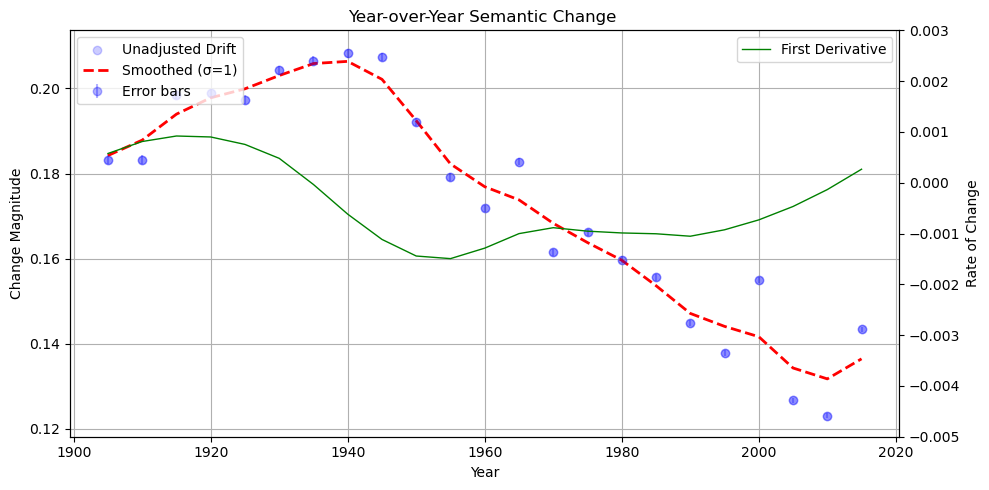

In [7]:
drift_scores = track_yearly_drift(
    start_year=1900,
    end_year=2015,
    year_step=5,
    model_dir=model_path,
    plot=True,
    error_type='CI',
    smooth=True,
    sigma=1,
    confidence=0.99
)

### `mean_cosine_similarity_to_all` class

In [8]:
model = W2VModel(f'{model_path}/w2v_y2015_wbnone_vs300_w004_mc001_sg1_e010.kv')

mean_sim = model.mean_cosine_similarity_to_all('person', '')
print(f"Mean cosine similarity = {mean_sim:.4f}")

Mean cosine similarity = 0.1620


Tracking semantic drift for word: 'human' (Excluding: 0 words)


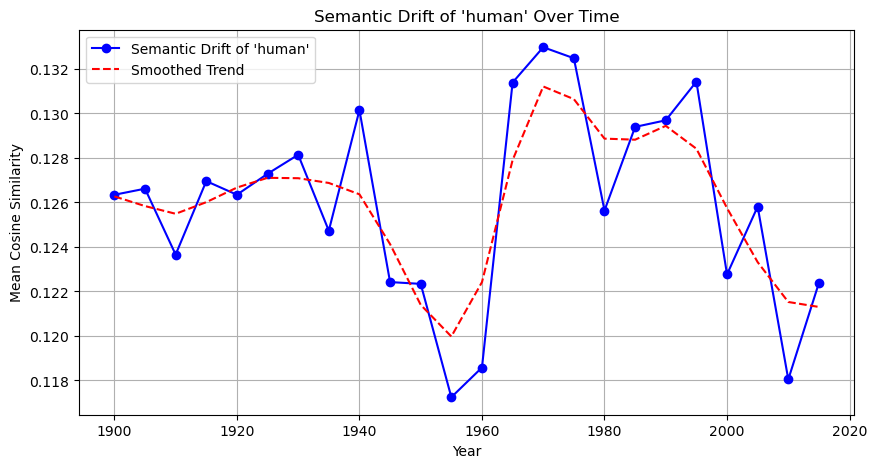

{1900: (0.12634553345718308, 0),
 1905: (0.12661984680157806, 0),
 1910: (0.12365655724977075, 0),
 1915: (0.12695911640301835, 0),
 1920: (0.12634835341327624, 0),
 1925: (0.12728855909350228, 0),
 1930: (0.12814480004028495, 0),
 1935: (0.12473038657503116, 0),
 1940: (0.1301499963904776, 0),
 1945: (0.12242253246224284, 0),
 1950: (0.12234179183033395, 0),
 1955: (0.11724736059114342, 0),
 1960: (0.1185816482068985, 0),
 1965: (0.13139188053812462, 0),
 1970: (0.1329776787028252, 0),
 1975: (0.13248278286254203, 0),
 1980: (0.12563910509585127, 0),
 1985: (0.1293965688717697, 0),
 1990: (0.1296929605294136, 0),
 1995: (0.13143298439727297, 0),
 2000: (0.1227664945355304, 0),
 2005: (0.12581552028162407, 0),
 2010: (0.11804784948448464, 0),
 2015: (0.12238528792742953, 0)}

In [146]:
track_word_semantic_drift(
    word='human',
    start_year=1900,
    end_year=2015,
    year_step=5,
    model_dir=f'{model_path}',
    plot=1,
    smooth=True,
    sigma=1
)

### `cosine_similarity_over_years` function

The `cosine_similarity_time_series` function uses the `compare_words_cosim` method to track the relationship between a pair of words across time. Simply specify your two words (`word1` and `word2`), a `start_year` and `end_year`, and the model directory. You'll get a list of years and associated cosine similarities; set `plot=True` if you want to graph them. The model will skip any years for which there is no model or there words aren't in the models' shared vocabulary.

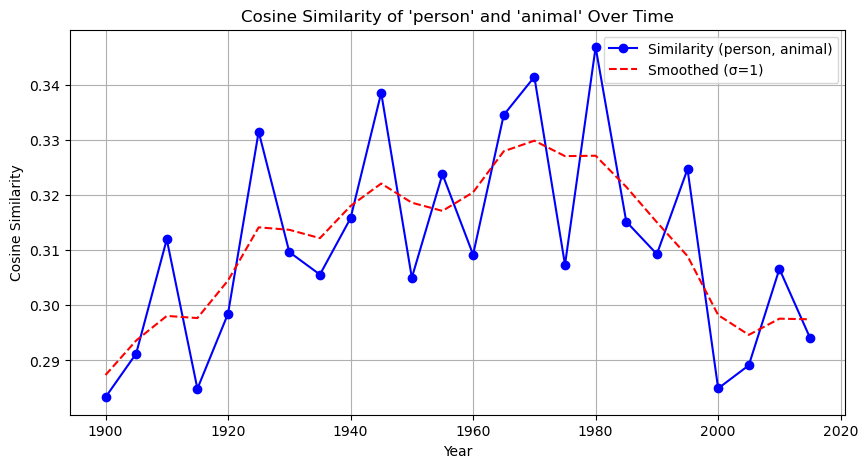

{1900: 0.28332978,
 1905: 0.29123265,
 1910: 0.31195283,
 1915: 0.28487036,
 1920: 0.29848212,
 1925: 0.33146083,
 1930: 0.3096479,
 1935: 0.3055643,
 1940: 0.31578833,
 1945: 0.3385156,
 1950: 0.30499294,
 1955: 0.32376778,
 1960: 0.30918288,
 1965: 0.33449805,
 1970: 0.3414046,
 1975: 0.30734923,
 1980: 0.34678432,
 1985: 0.31516817,
 1990: 0.30927145,
 1995: 0.32468924,
 2000: 0.2849265,
 2005: 0.28911433,
 2010: 0.30659163,
 2015: 0.29408368}

In [150]:
cosine_similarity_over_years(
    word1='person',
    word2='animal',
    start_year=1900,
    end_year=2015,
    year_step=5,
    model_dir=f'{model_path}',
    plot=1,
    smooth=True,
    sigma=1
)

### `compute_weat` method
This method runs a Word Embedding Association Test (WEAT) as described in [Caliskan, Bryson, and Narayanan, 2017](https://www.science.org/doi/10.1126/science.aal4230). The WEAT is a close analog of the Implicit Association Test (IAT; [Greenwald, McGhee, & Schwarz, 1995](https://psycnet.apa.org/record/1998-02892-004))—but, whereas the IAT uses reaction latencies to measure a person's cognitive association between two mental category constrasts, the WEAT uses cosine similarities to measure the semantic association between linguistic category contrasts in a corpus.

Just as with the IAT, the WEAT requires that you select two constrasting "target" categories (e.g., _man_ vs. _woman_) and two contrasting "attribute" categories (e.g., _science_ vs. _art_), as well as a list of exemplars of each of these four categories. The `compute_weat` method then:
1. calculates the mean of all pairwise cosine similarities among exemplars within each target–attribute combination (e.g., $\bar c_{man, science}$, $\bar c_{man, art}$, $\bar c_{woman, science}$, $\bar c_{woman, art}$),
2. takes the difference in mean similarity between combinations involving the same target (e.g., $\bar c_{man, science} - \bar c_{man, art}$ and $\bar c_{woman, science} - \bar c_{woman, art}$),
3. subtracts these differences from one another (e.g., $[(\bar c_{man, science} - \bar c_{man, art}) - (\bar c_{woman, science} - \bar c_{woman, art})]$), and
4. divides this difference by the pooled standard deviation across all exemplars for all target–attribute pairs.

This calculation yields an effect size, $d$, analogous to that used in IAT research. Higher scores indicate a stronger relative semantic link between the first target and first attribute (e.g., between _man_ and _science_).

In [12]:
model = W2VModel(f'{model_path}/w2v_y2015_wbnone_vs300_w004_mc001_sg1_e010.kv')

target1 = ["poor", "poverty"]
target2 = ["rich", "wealthy"]
attribute1 = ["happy", "joy"]
attribute2 = ["unhappy", "miserable"]

weat_score, p = model.compute_weat(
    target1,
    target2,
    attribute1,
    attribute2,
    num_permutations=1_000
)

print(f"WEAT effect size (Cohen's d) = {weat_score:.4f}, p = {p:.4f}")

WEAT effect size (Cohen's d) = -0.7265, p = 0.4710


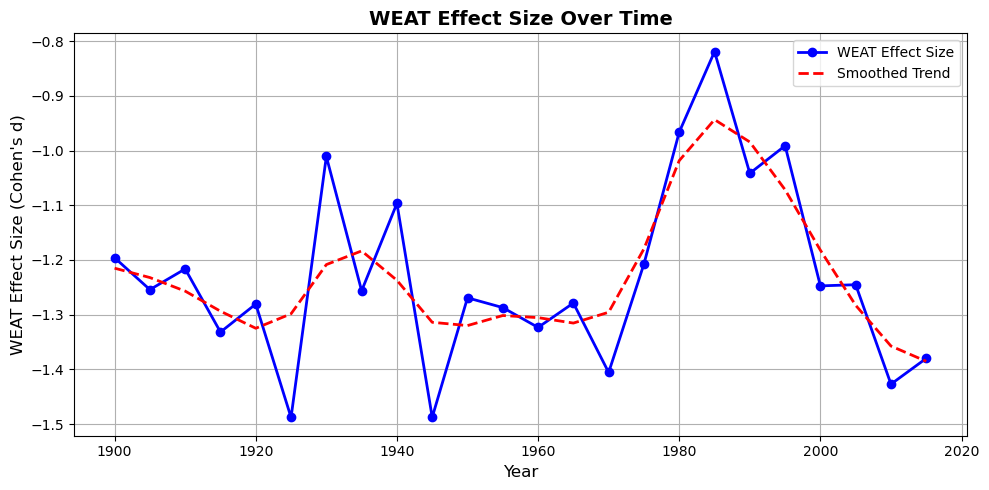

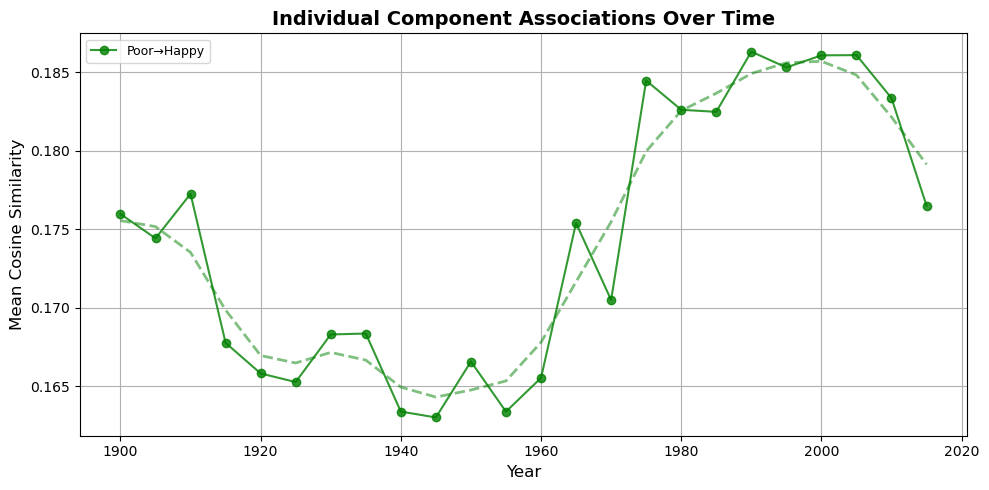

{1900: (-1.1959842,
  None,
  None,
  {'Poor→Happy': 0.17596997,
   'Poor→Unhappy': 0.26855317,
   'Rich→Happy': 0.18705513,
   'Rich→Unhappy': 0.19040254}),
 1905: (-1.2542663,
  None,
  None,
  {'Poor→Happy': 0.17442107,
   'Poor→Unhappy': 0.27283612,
   'Rich→Happy': 0.18018866,
   'Rich→Unhappy': 0.18045384}),
 1910: (-1.2163892,
  None,
  None,
  {'Poor→Happy': 0.17725198,
   'Poor→Unhappy': 0.26819798,
   'Rich→Happy': 0.18387514,
   'Rich→Unhappy': 0.18267299}),
 1915: (-1.3318701,
  None,
  None,
  {'Poor→Happy': 0.16777094,
   'Poor→Unhappy': 0.26611787,
   'Rich→Happy': 0.1634406,
   'Rich→Unhappy': 0.17262603}),
 1920: (-1.2806479,
  None,
  None,
  {'Poor→Happy': 0.16582629,
   'Poor→Unhappy': 0.2757417,
   'Rich→Happy': 0.1622845,
   'Rich→Unhappy': 0.19310139}),
 1925: (-1.4879276,
  None,
  None,
  {'Poor→Happy': 0.16527852,
   'Poor→Unhappy': 0.28230736,
   'Rich→Happy': 0.17544056,
   'Rich→Unhappy': 0.18361287}),
 1930: (-1.0107269,
  None,
  None,
  {'Poor→Happy': 0.

In [18]:
target1 = {'Poor': ['poor', 'penniless', 'needy', 'destitute', 'lower-class', 'beggar', 'panhandle']}
target2 = {'Rich': ['wealthy', 'upper-class', 'affluent', 'propertied']}
attribute1 = {'Happy': ['happy', 'joyful', 'joyous', 'glad', 'blissful', 'merry', 'cheerful', 'content', 'tranquil']}
attribute2 = {'Unhappy': ['unhappy', 'miserable', 'misery', 'sad']}

compute_weat_over_years(
    target1,
    target2,
    attribute1,
    attribute2,
    start_year=1900,
    end_year=2015,
    year_step=5,
    model_dir=f"{model_path}",
    num_permutations=0,
    plot=1,
    smooth=True,
    sigma=1,
    return_std=False,
    return_associations=True,
    plot_associations=['Poor→Happy']
)

### `plot_nearest_neighbors` function

This function plots the N nearest neighbors to a target word for a specific year, showing their cosine similarity scores in a horizontal bar chart.

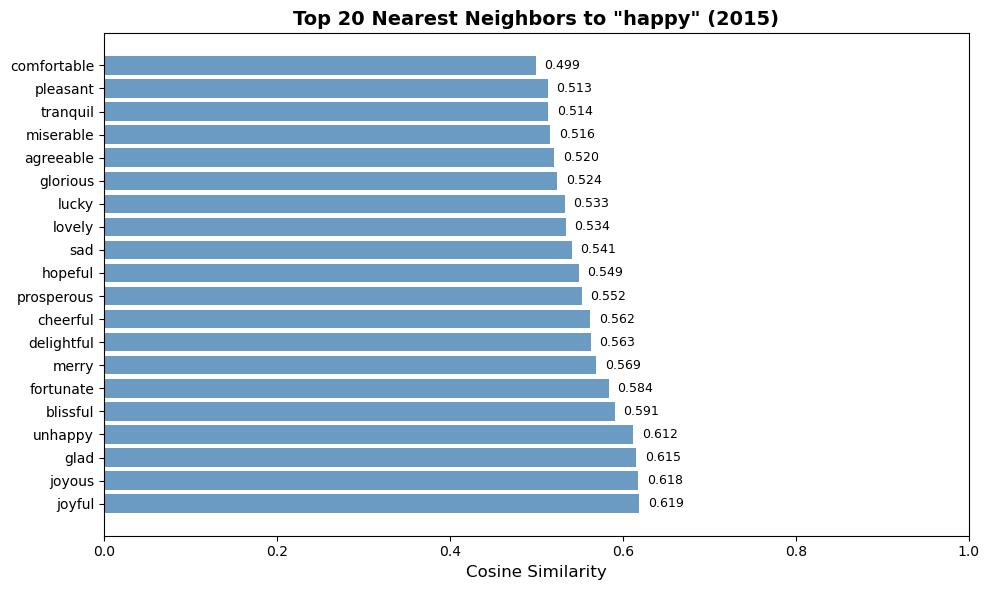


Nearest neighbors:
  joyful: 0.6186
  joyous: 0.6178
  glad: 0.6154
  unhappy: 0.6120
  blissful: 0.5906
  fortunate: 0.5835
  merry: 0.5693
  delightful: 0.5629
  cheerful: 0.5623
  prosperous: 0.5524
  hopeful: 0.5491
  sad: 0.5408
  lovely: 0.5340
  lucky: 0.5329
  glorious: 0.5243
  agreeable: 0.5204
  miserable: 0.5161
  tranquil: 0.5138
  pleasant: 0.5128
  comfortable: 0.4990


In [7]:
neighbors = plot_nearest_neighbors(
    word='happy',
    year=2015,
    model_dir=model_path,
    n=20
)

print("\nNearest neighbors:")
for word, similarity in neighbors:
    print(f"  {word}: {similarity:.4f}")